In [1]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('data.csv')
data.drop(['id','Unnamed: 32'],axis=1, inplace=True)
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [2]:
M = data[data.diagnosis == 'M']
B = data[data.diagnosis == 'B']

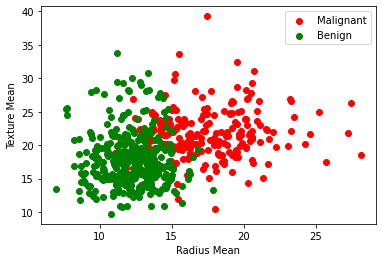

In [3]:
plt.scatter(M.radius_mean,M.texture_mean, c='red', label='Malignant' )
plt.scatter(B.radius_mean,B.texture_mean, c='green', label='Benign' )
plt.legend()
plt.xlabel('Radius Mean')
plt.ylabel('Texture Mean')
plt.show()

In [4]:
data['diagnosis'] = [1 if each == 'M' else 0 for each in data['diagnosis']]
y = data['diagnosis'].values
x_data = data.drop('diagnosis', axis=1)
x = (x_data - np.min(x_data)) / (np.max(x_data)-np.min(x_data)).values

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state=1)
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)

print('{} Nearest Neighbor Score : {} '.format(6,knn.score(x_test,y_test)))

6 Nearest Neighbor Score : 0.9649122807017544 


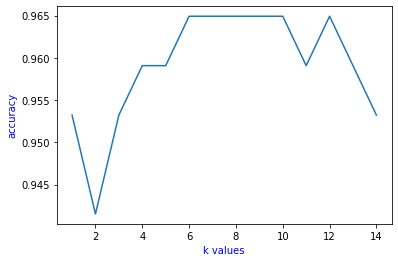

In [6]:
# finding k value
score_list = []
for each in range(1,15):
    knn2 = KNeighborsClassifier(n_neighbors=each)
    knn2.fit(x_train,y_train)
    score_list.append(knn2.score(x_test,y_test))

plt.plot(range(1,15), score_list)
plt.xlabel('k values',color='blue')
plt.ylabel('accuracy',color='blue')
plt.show()